In [1]:
import math
import cv2
from time import time
import matplotlib.pyplot as plt
import time

In [4]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#ML
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn import metrics
from pandas.core.common import random_state

In [5]:
!pip install mediapipe

In [6]:
import mediapipe as mp

In [7]:
mp_pose = mp.solutions.pose

pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.6, model_complexity=2)
mp_drawing = mp.solutions.drawing_utils

In [8]:
#mp_drawing = mp.solutions.drawing_utils
#mp_hands = mp.solutions.hands  # For hand tracking
#mp_face_mesh = mp.solutions.face_mesh  # For face mesh

In [9]:
def calculateAngle(landmark1, landmark2, landmark3):

    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3


    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))


    if angle < 0:


        angle += 360
    return angle

In [10]:
def detectPose(image, pose, display=True):
    output_image = image.copy()

    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = pose.process(imageRGB)


    height, width, _ = image.shape

    # Initialize a list to store the detected landmarks.
    landmarks = []

    # Check if any landmarks are detected.
    if results.pose_landmarks:

        # Draw Pose landmarks on the output image.
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS)

        # Iterate over the detected landmarks.
        for landmark in results.pose_landmarks.landmark:

            # Append the landmark into the list.
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z * width)))

    # Check if the original input image and the resultant image are specified to be displayed.
    if display:

        # Display the original input image and the resultant image.
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');

        # Also Plot the Pose landmarks in 3D.
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

    # Otherwise
    else: # Return the output image and the found landmarks.
        return output_image, landmarks

In [11]:
head_knee_right_list=[]
head_knee_left_list=[]
label_list=[]

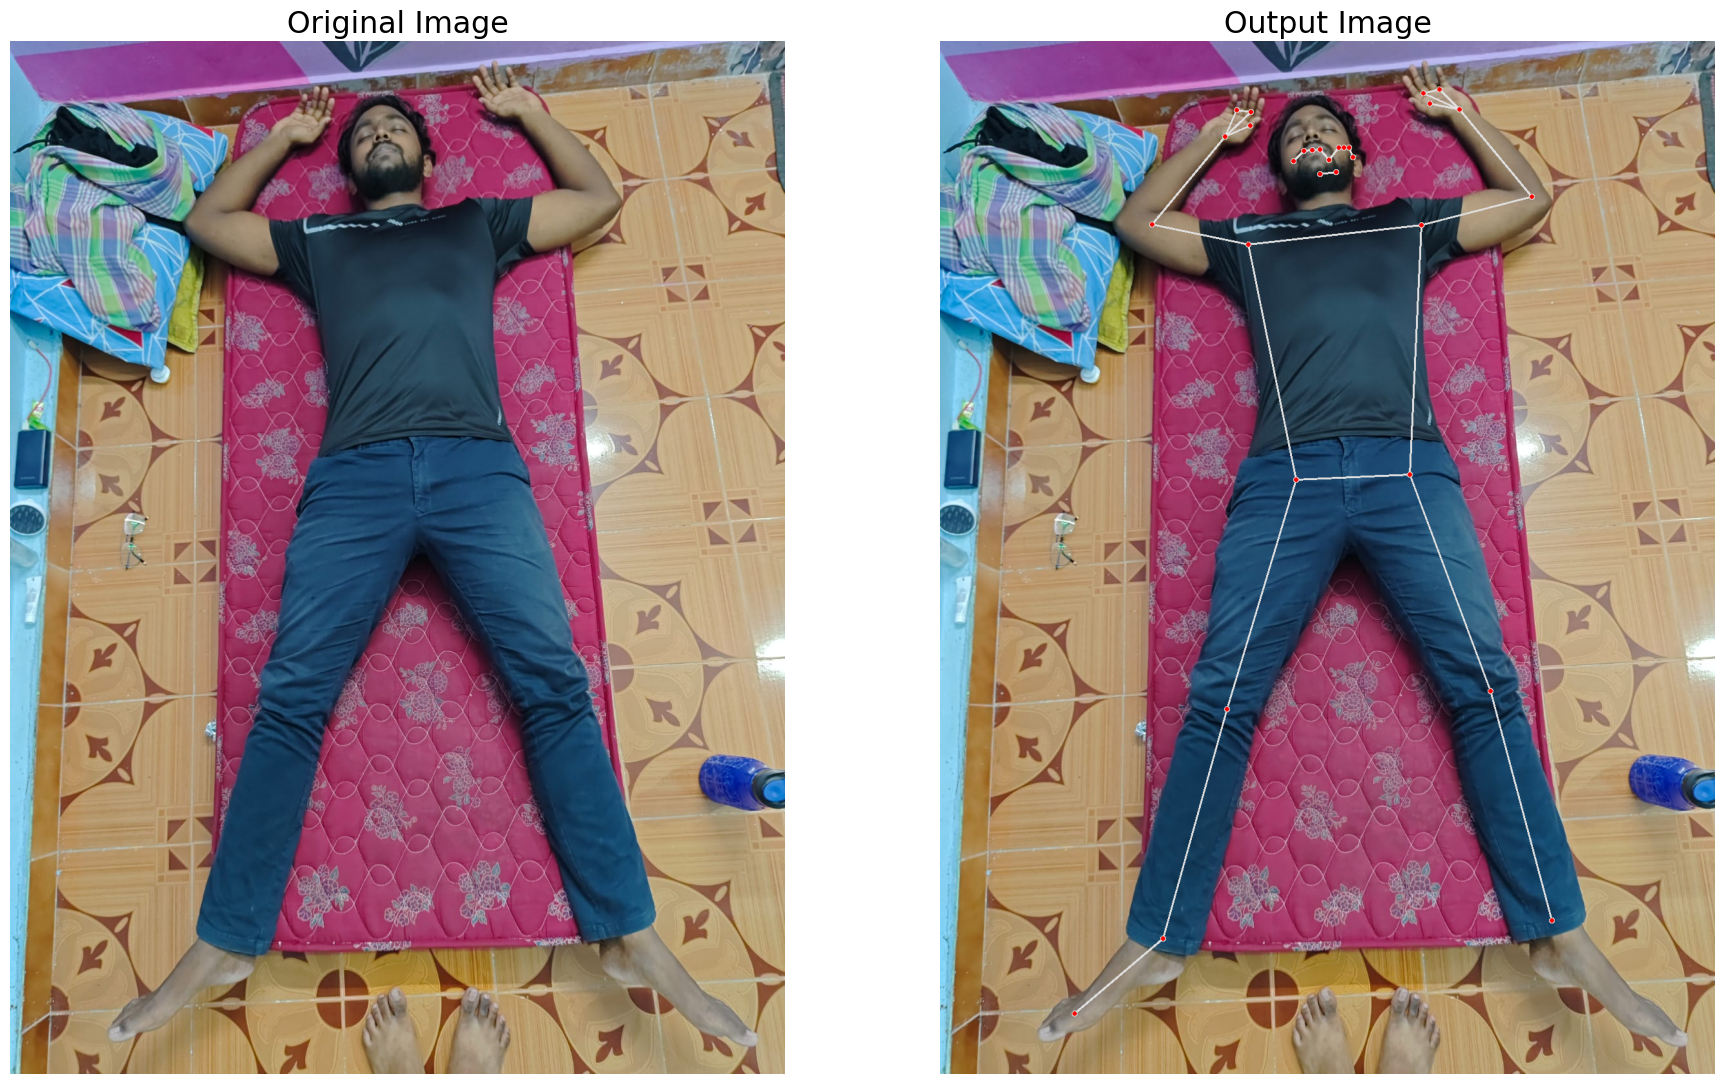

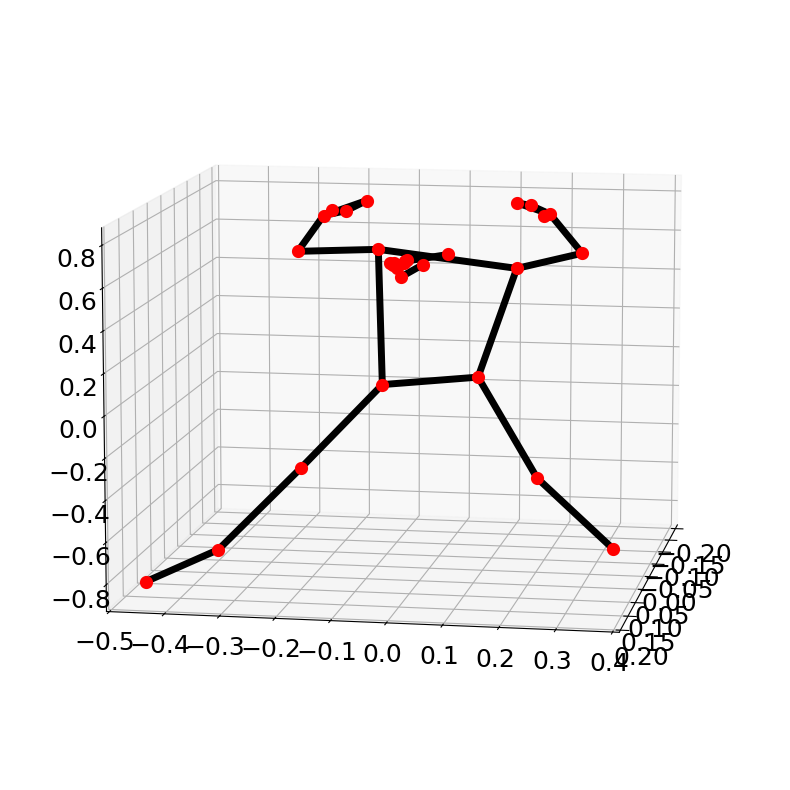

In [54]:
# Read another sample image and perform pose detection on it.
image = cv2.imread('/content/89.jpg')
detectPose(image, pose, display=True)

In [13]:
def classifyPose(landmarks, output_image,display = False):
    label = 'Unknown Pose'
    color = (0, 0, 255)
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])


    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])


    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])


    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])


    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])


    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])

    right_hip_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])



    left_hip_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value])


    head_knee_right=calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value])


    head_knee_left=calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value])
    # print("left_elbow_angle",left_elbow_angle)
    # print("right_elbow_angle",right_elbow_angle)

    # print("left_shoulder_angle",left_shoulder_angle)
    # print("right_shoulder_angle",right_shoulder_angle)

    # print("left_knee_angle",left_knee_angle)
    # print("right_knee_angle",right_knee_angle)

    # print("left_hip_angle",left_hip_angle)
    # print("right_hip_angle",right_hip_angle)

    # print("head_knee_right",head_knee_right)
    # print("head_knee_left",head_knee_left)


    # print(left_elbow_angle)
    # print(right_elbow_angle)

    # print(left_shoulder_angle)
    # print(right_shoulder_angle)

    # print(left_knee_angle)
    # print(right_knee_angle)

    # print(left_hip_angle)
    # print(right_hip_angle)

    print(head_knee_right,head_knee_left)
    # print(head_knee_left)


    #----------------------------------------------------------------------------------------------------------------

    # Check if it is the warrior II pose or the T pose.
    # As for both of them, both arms should be straight and shoulders should be at the specific angle.
    #----------------------------------------------------------------------------------------------------------------

    # Check if the both arms are straight.
    if head_knee_right  > 165 and head_knee_right  < 214 and head_knee_left >= 165 and head_knee_left <= 211:
      label = 'log'
    elif head_knee_right  > 45 and head_knee_right  < 140 and head_knee_left > 45 and head_knee_left < 140:
      label = 'fetus'
    elif head_knee_right > 140 and head_knee_right  < 280 and head_knee_left > 140 and head_knee_left< 280:
      label = 'starfish'


    if label != 'Unknown Pose':

        # Update the color (to green) with which the label will be written on the image.
        color = (0, 255, 0)

    # Write the label on the output image.
    cv2.putText(output_image, label, (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, color, 2)

    # Check if the resultant image is specified to be displayed.
    if display:
        print(head_knee_right,head_knee_left,label)
        #print(head_knee_left)
        # Display the resultant image.
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');

    else:
        print(head_knee_right,head_knee_left,label)
        head_knee_right_list.append(head_knee_right)
        head_knee_left_list.append(head_knee_left)
        label_list.append(label)

        # Return the output image and the classified label.
        return label

In [14]:
import cv2
print("/content/89.jpg")
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image)

/content/89.jpg
208.2646897127677 156.86783871457018
208.2646897127677 156.86783871457018 starfish


In [15]:
#STARFISH POSITION
'''import zipfile
import os
import cv2
import mediapipe as mp
import math
import pandas as pd

# Step 1: Extract ZIP file
zip_path = "/content/starfish.zip"  # Update this if needed
extract_folder = "/content/starfish_extracted"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Step 2: Locate the inner folder (assuming there's only **one** folder inside)
inner_folders = [f for f in os.listdir(extract_folder) if os.path.isdir(os.path.join(extract_folder, f))]
if not inner_folders:
    raise Exception("No inner folder found inside the ZIP!")

image_folder = os.path.join(extract_folder, inner_folders[0])  # Path to the actual images

# Step 3: List extracted images
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Step 4: Initialize Mediapipe Pose Model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.6, model_complexity=2)

# Function to calculate angles
def calculateAngle(landmark1, landmark2, landmark3):
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3

    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    return angle if angle >= 0 else angle + 360

# Function to classify pose and extract angles
def classifyPose(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return None, None  # Handle missing or unreadable images

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    if not results.pose_landmarks:
        return None, None  # No pose detected

    landmarks = results.pose_landmarks.landmark

    head_knee_right = calculateAngle(
        (landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y, 0),
        (landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y, 0),
        (landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y, 0)
    )

    head_knee_left = calculateAngle(
        (landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y, 0),
        (landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y, 0),
        (landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y, 0)
    )

    return head_knee_right, head_knee_left

# Step 5: Process all images and store results
results = []
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    try:
        head_knee_right, head_knee_left = classifyPose(image_path)
        results.append((image_file, head_knee_right, head_knee_left))
    except Exception as e:
        results.append((image_file, None, None))  # Handle errors gracefully

# Step 6: Convert results to DataFrame
df_results = pd.DataFrame(results, columns=["Image Name", "Head-Knee Right Angle", "Head-Knee Left Angle"])

# Step 7: Display Results
print(df_results)

# Step 8: Save as CSV (Optional)
df_results.to_csv("/content/starfish_angles.csv", index=False)'''


'import zipfile\nimport os\nimport cv2\nimport mediapipe as mp\nimport math\nimport pandas as pd\n\n# Step 1: Extract ZIP file\nzip_path = "/content/starfish.zip"  # Update this if needed\nextract_folder = "/content/starfish_extracted"\n\nwith zipfile.ZipFile(zip_path, \'r\') as zip_ref:\n    zip_ref.extractall(extract_folder)\n\n# Step 2: Locate the inner folder (assuming there\'s only **one** folder inside)\ninner_folders = [f for f in os.listdir(extract_folder) if os.path.isdir(os.path.join(extract_folder, f))]\nif not inner_folders:\n    raise Exception("No inner folder found inside the ZIP!")\n\nimage_folder = os.path.join(extract_folder, inner_folders[0])  # Path to the actual images\n\n# Step 3: List extracted images\nimage_files = [f for f in os.listdir(image_folder) if f.lower().endswith((\'.png\', \'.jpg\', \'.jpeg\'))]\n\n# Step 4: Initialize Mediapipe Pose Model\nmp_pose = mp.solutions.pose\npose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.6, model_com

In [16]:
data = pd.read_csv('SaYoPillow.csv',
                 names= ['snoring_rate','respiration_rate','body_temperature','limb_movement','blood_oxygen',
                        'eye_movement','sleeping_hours','heart_rate','stress_level'],header = 0)
data.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring_rate      630 non-null    float64
 1   respiration_rate  630 non-null    float64
 2   body_temperature  630 non-null    float64
 3   limb_movement     630 non-null    float64
 4   blood_oxygen      630 non-null    float64
 5   eye_movement      630 non-null    float64
 6   sleeping_hours    630 non-null    float64
 7   heart_rate        630 non-null    float64
 8   stress_level      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [18]:
data.describe()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


In [19]:
data.shape

(630, 9)

In [20]:
#checking for null values
data.isnull().sum()

,0
snoring_rate,0
respiration_rate,0
body_temperature,0
limb_movement,0
blood_oxygen,0
eye_movement,0
sleeping_hours,0
heart_rate,0
stress_level,0


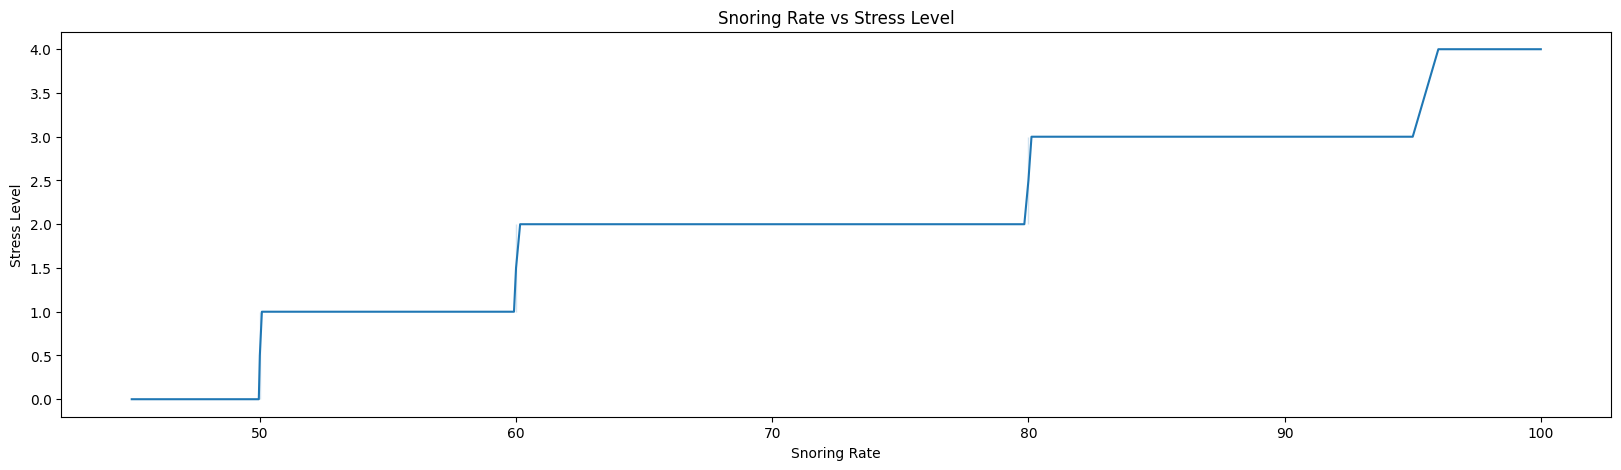

In [21]:
plt.figure(figsize=(20,5))
sns.lineplot(x='snoring_rate',y='stress_level',data=data)
plt.xlabel("Snoring Rate")
plt.ylabel('Stress Level')
plt.title('Snoring Rate vs Stress Level')
plt.xticks(rotation=0)
plt.show()

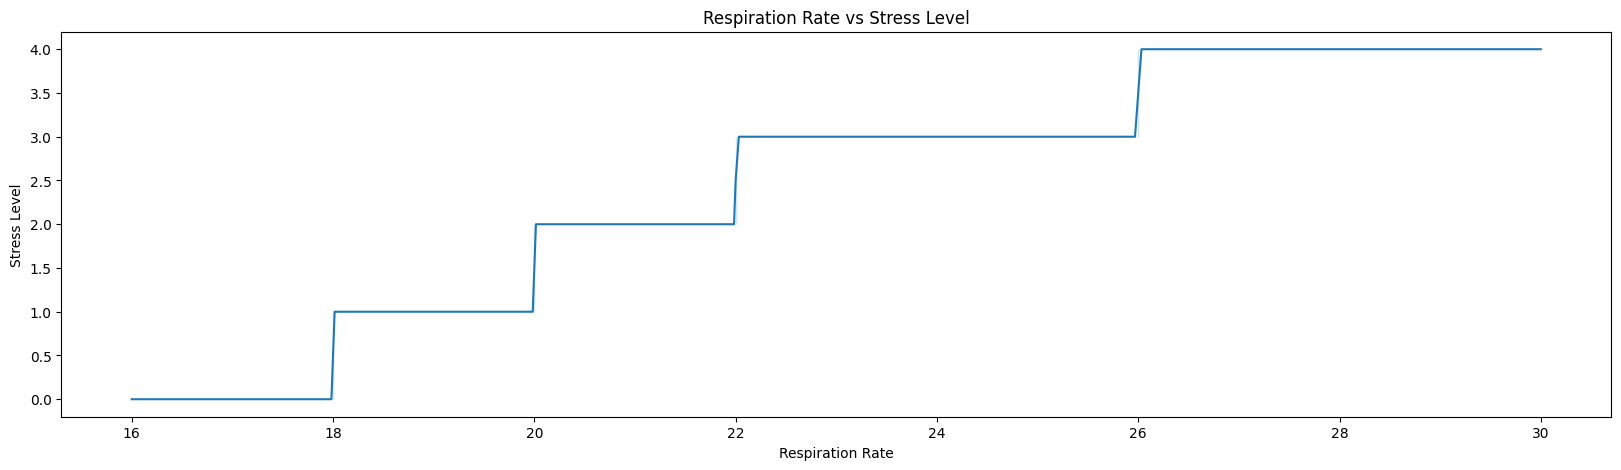

In [22]:
plt.figure(figsize=(20,5))
sns.lineplot(x='respiration_rate',y='stress_level',data=data)
plt.xlabel("Respiration Rate")
plt.ylabel('Stress Level')
plt.title('Respiration Rate vs Stress Level')
plt.xticks(rotation=0)
plt.show()

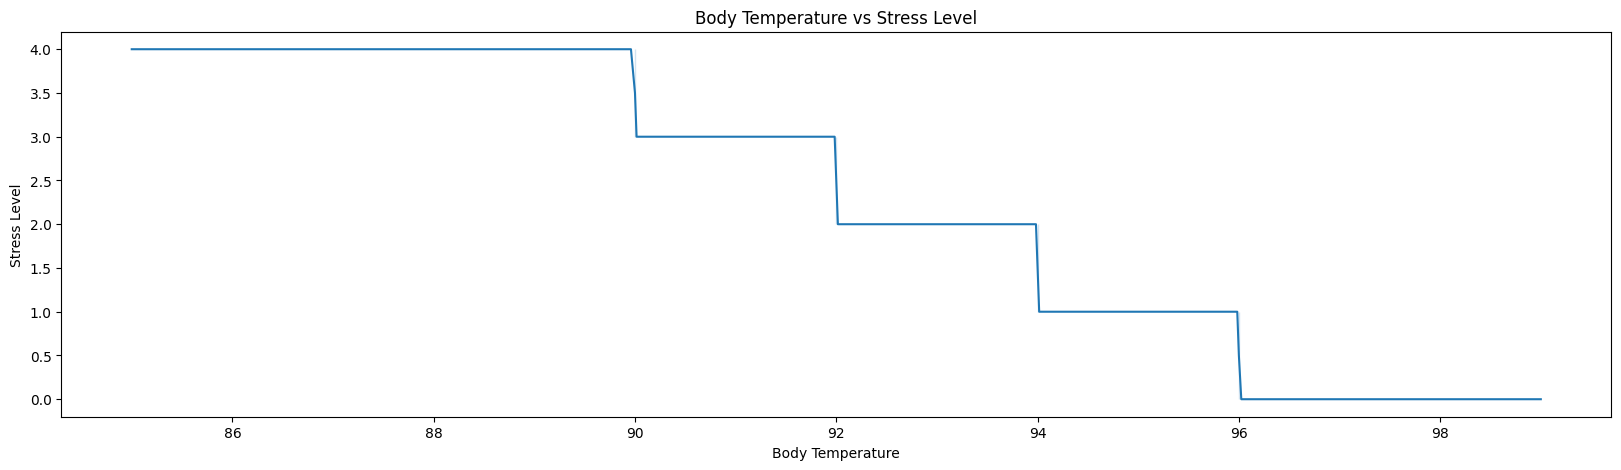

In [23]:
plt.figure(figsize=(20,5))
sns.lineplot(x='body_temperature',y='stress_level',data=data)
plt.xlabel("Body Temperature")
plt.ylabel('Stress Level')
plt.title('Body Temperature vs Stress Level')
plt.xticks(rotation=0)
plt.show()


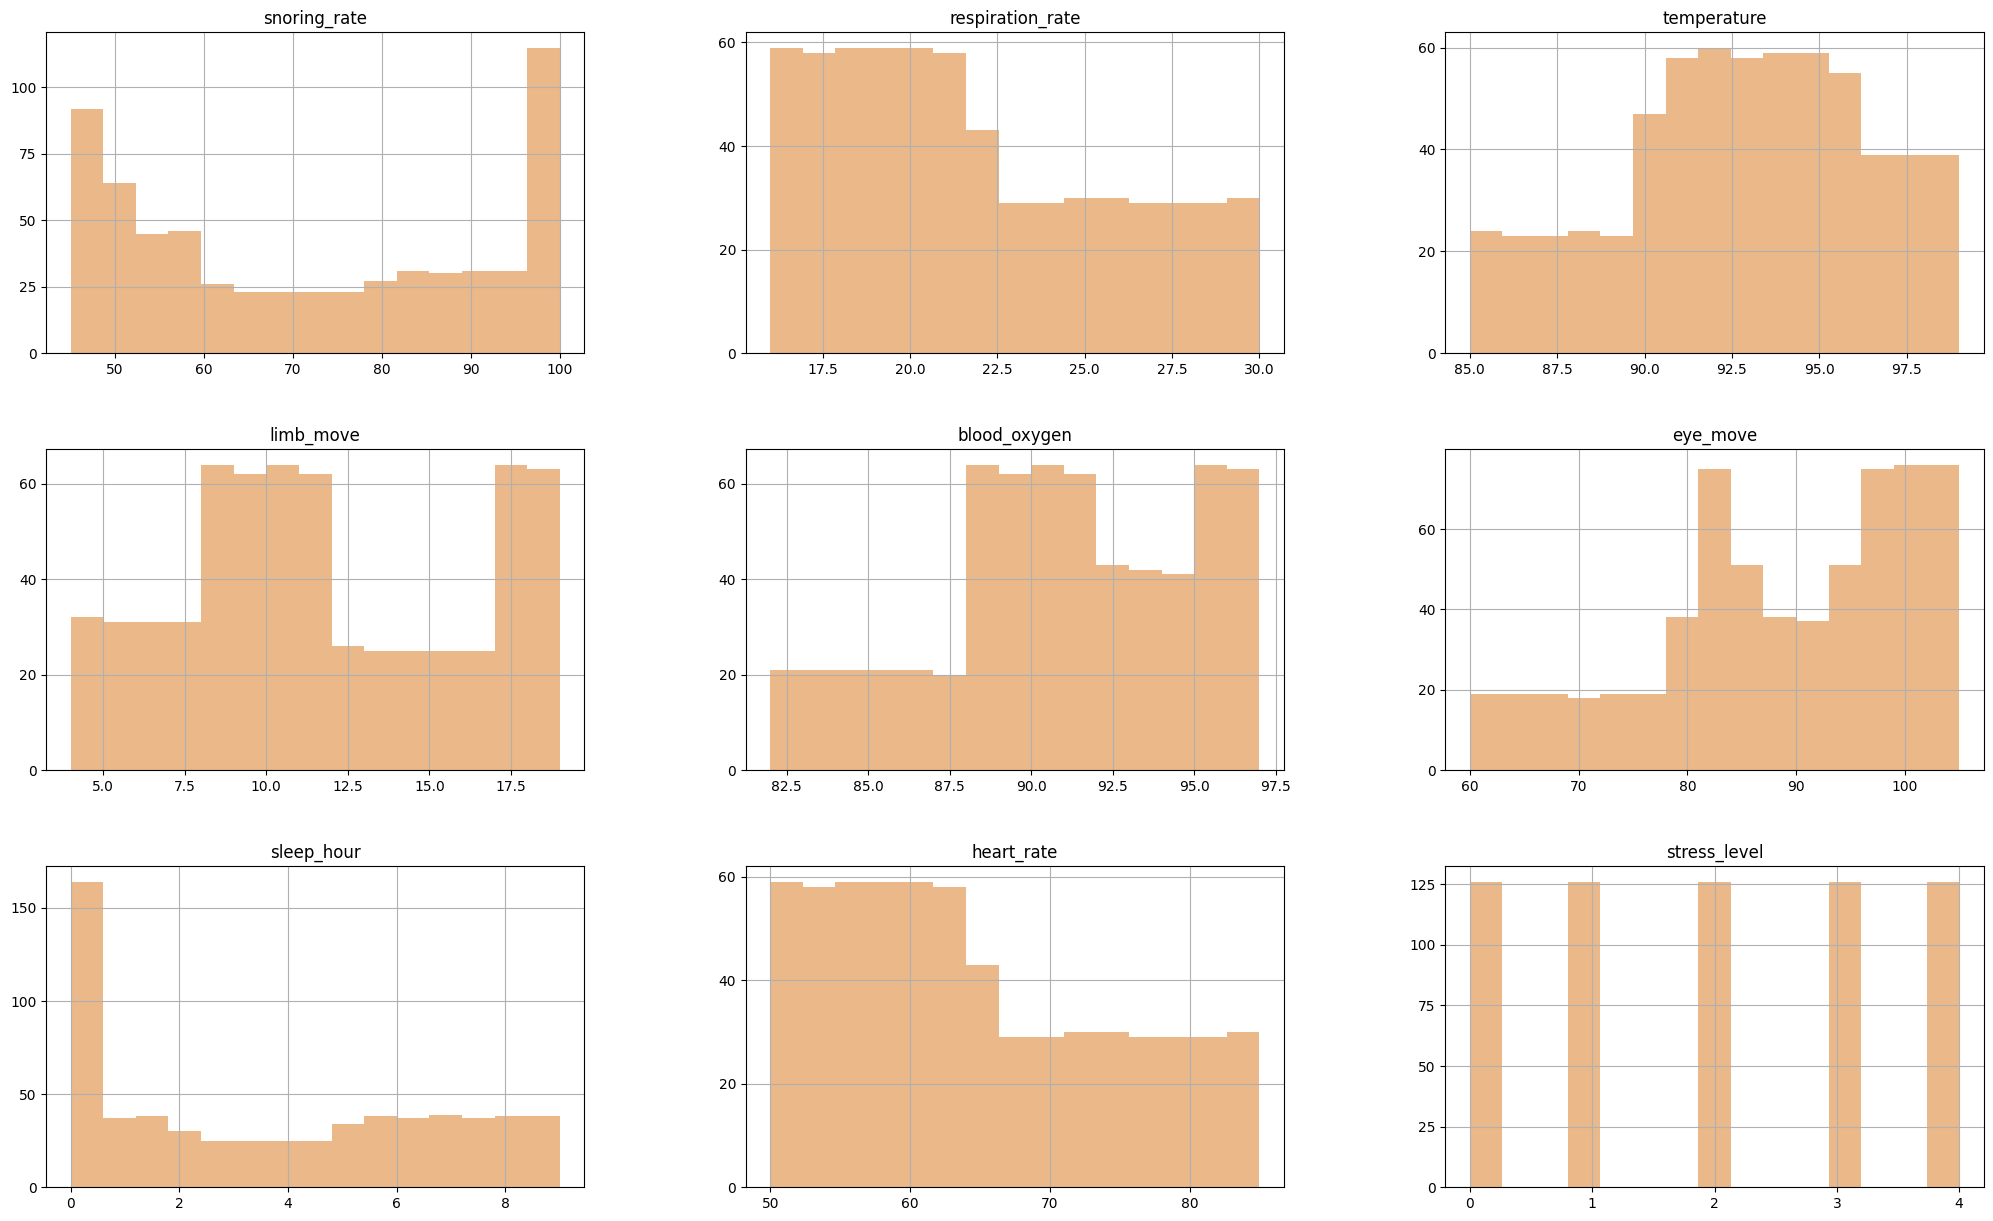

In [24]:

data.columns = ['snoring_rate', 'respiration_rate', 'temperature', 'limb_move', 'blood_oxygen', 'eye_move', 'sleep_hour', 'heart_rate', 'stress_level']
color = '#eab889'
data = data.copy()

data.hist(bins=15,figsize=(25,15),color=color)
plt.rcParams['font.size'] = 18
plt.show()


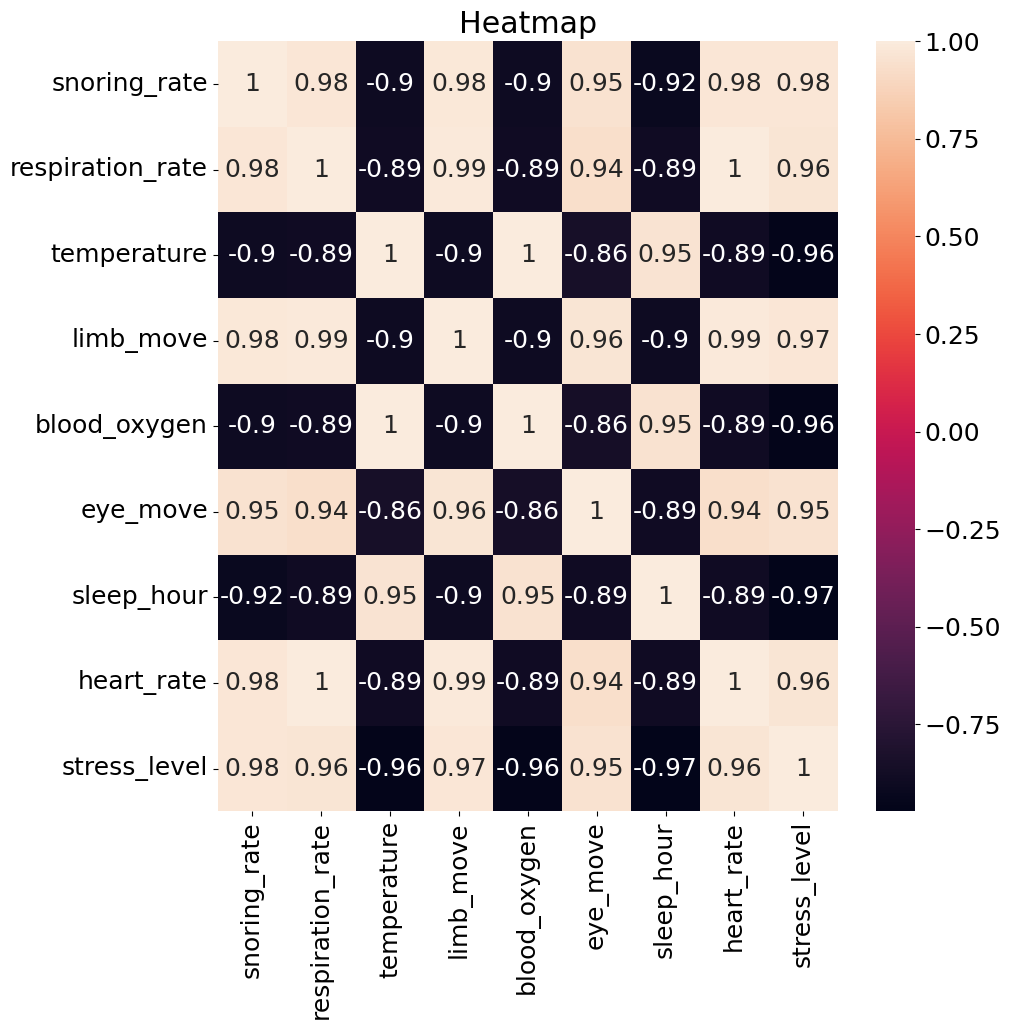

In [25]:
plt.figure(figsize=(10,10))
tc = data.corr()
sns.heatmap(tc,annot=True)
plt.title('Heatmap')
plt.show()

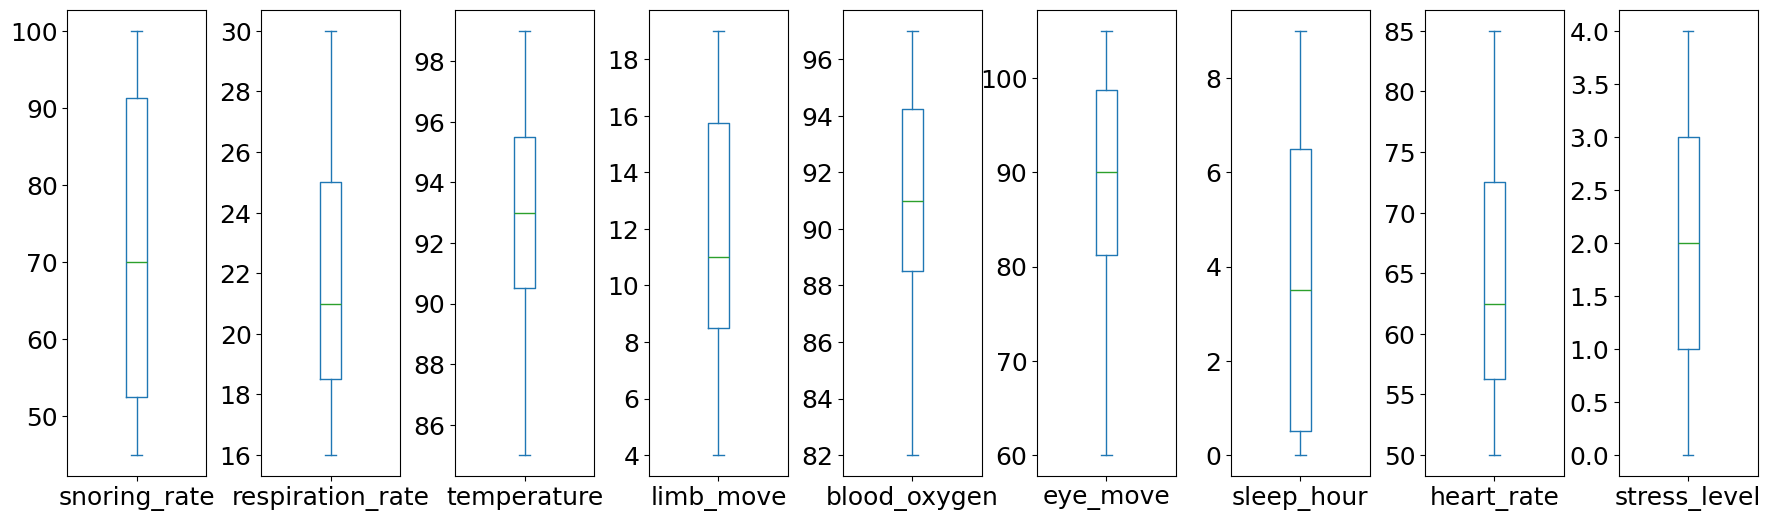

In [26]:
#Outlier detection
data.plot(kind='box', subplots=True, layout=(2,14),figsize=(14,14), sharex=False, sharey=False)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=2,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

In [27]:
#seperating data
x = data.copy();
x.drop('stress_level', axis = 1, inplace = True)
y = data['stress_level']

In [28]:
#Normalize data features using minmax.
x = minmax_scale(x)
#Separating training data and testing data with a ratio of 80%:20%.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2,random_state =123)
data_preprocessed = pd.DataFrame(x, columns = ['snoring_rate', 'respiration_rate', 'temperature', 'limb_move', 'blood_oxygen', 'eye_move', 'sleep_hour', 'heart_rate'])
data_preprocessed['stress_level'] = y
data_preprocessed.head()

,snoring_rate,respiration_rate,temperature,limb_move,blood_oxygen,eye_move,sleep_hour,heart_rate,stress_level
0,0.887273,0.691429,0.488571,0.840000,0.522667,0.880000,0.204444,0.691429,3
1,0.848000,0.650286,0.468000,0.792000,0.503467,0.864000,0.172444,0.650286,3
2,0.272727,0.285714,0.785714,0.400000,0.866667,0.555556,0.777778,0.285714,1
3,0.741091,0.538286,0.412000,0.661333,0.451200,0.820444,0.085333,0.538286,3
4,0.056727,0.089143,0.919429,0.166400,0.949867,0.277333,0.916444,0.089143,0


In [29]:
X_train.shape

(504, 8)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [31]:
# Create K-NN Model
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train, y_train)
predict_KNN = model_KNN.predict(X_test)
# Create NB Model
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
predict_NB = model_NB.predict(X_test)
# Create DT Model
model_DT = DecisionTreeClassifier(max_depth=40,random_state=101)
model_DT.fit(X_train, y_train)
predict_DT = model_DT.predict(X_test)

In [32]:
#KNN
#confusion_matrix = metrics.confusion_matrix(y_test, predict_KNN)
#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4])
#cm_display.plot()
#plt.show()

#print(classification_report(y_test, predict_KNN))

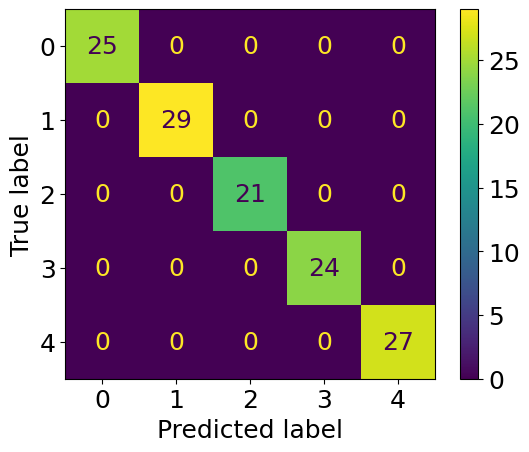

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        27

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [33]:
confusion_matrix = metrics.confusion_matrix(y_test, predict_NB)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4])

cm_display.plot()
plt.show()
y_t = y_test
print(classification_report(y_test, predict_NB))

In [34]:
#confusion_matrix = metrics.confusion_matrix(y_test, predict_DT)

#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4])
#cm_display.plot()
#plt.show()

#print(classification_report(y_test, predict_DT))

In [35]:
#def predict_stress_level(model_NB, input_data):
 # data_2 = minmax_scale(input_data)
 # predict_NB = model_NB.predict(data_2)
 # return predict_NB

In [36]:

def predict_stress_level(model_NB, input_data):
    """
    Predict stress levels using the trained Naive Bayes model.

    Parameters:
    model_NB: Trained Naive Bayes model.
    input_data (list or array-like): Input features for prediction.

    Returns:
    int: Predicted stress level.
    """
    # Convert input_data to a 2D array (required for minmax_scale)
    input_data = np.array(input_data).reshape(1, -1)

    # Apply min-max scaling correctly
    data_2 = minmax_scale(input_data, feature_range=(0, 1))

    # Predict stress level
    predict_NB = model_NB.predict(data_2)

    return predict_NB[0]  # Return a single predicted value

# Example Usage:
# model = train_naive_bayes('SaYoPillow.csv')  # Train the model first
# stress_level = predict_stress_level(model, [93.80, 25.680, 91.840, 16.600, 89.840, 99.60])
# print("Predicted Stress Level:", stress_level)


In [37]:
def get_stress_level(label):

    stress_levels = {
        "log": 2,        # Moderate stress
        "starfish": 1,   # Relaxed, low stress
        "fetus": 4       # High stress, anxiety prone
    }

    # Return the predefined stress level
    if label in stress_levels:
        return stress_levels[label]
    else:
        raise ValueError("Invalid sleeping position. Choose from 'log', 'starfish', or 'fetus'.")

In [38]:
def final_stress(model_NB,label,values):
  stress_level_1 = get_stress_level(label)
  stress_level_2 = predict_stress_level(model_NB,values)
  final_stress_level = (stress_level_1 + stress_level_2)/2
  return final_stress_level

In [39]:
'''def classify_video_pose_and_stress(video_path, csv_path, fps_limit=3, output_path=None):
    cap = cv2.VideoCapture(video_path)
    stress_data = pd.read_csv(csv_path)
    predictions = []

    # Video writer setup if output_path is provided
    if output_path:
        width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        fps = cap.get(cv2.CAP_PROP_FPS)
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_path, fourcc, fps_limit, (width, height))
    else:
        out = None

    interval = 1.0 / fps_limit
    frame_index = 0
    total_stress = 0
    start_time = time.time()

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret or frame_index >= len(stress_data):
            break

        current_time = time.time()
        elapsed_time = current_time - start_time

        if elapsed_time >= frame_index * interval:
            image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            result = pose.process(image_rgb)

            pose_label = "No Pose"
            stress_value = None
            stress_pose = None
            current_stress = None
            avg_stress = None

            # Pose classification
            if result.pose_landmarks:
                pose_label = classifyPose(result.pose_landmarks.landmark,frame)

            # Stress prediction using CSV row data
            stress_input = stress_data.iloc[frame_index]


            current_stress = final_stress(model_NB, pose_label, stress_input)
            total_stress += current_stress

            avg_stress = total_stress / elapsed_time if elapsed_time > 0 else 0

            # Overlay pose_label and current_stress on video frame
            text1 = f"Pose: {pose_label}"
            text2 = f"Stress: {current_stress:.2f}"

            cv2.putText(frame, text1, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            cv2.putText(frame, text2, (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

            # Show frame
            #cv2.imshow('Pose and Stress Analysis', frame)

            # Write frame to output video if needed
            if out:
                out.write(frame)

            # Press 'q' to stop early
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

            predictions.append({
                "frame": frame_index,
                "timestamp_sec": round(cap.get(cv2.CAP_PROP_POS_MSEC) / 1000.0, 2),
                "pose": pose_label,
                "stress_value": stress_value,
                "stress_pose": stress_pose,
                "current_stress": current_stress,
                "avg_stress": avg_stress
            })

            frame_index += 1

    cap.release()
    if out:
        out.release()
    cv2.destroyAllWindows()

    return predictions
'''

'def classify_video_pose_and_stress(video_path, csv_path, fps_limit=3, output_path=None):\n    cap = cv2.VideoCapture(video_path)\n    stress_data = pd.read_csv(csv_path)\n    predictions = []\n\n    # Video writer setup if output_path is provided\n    if output_path:\n        width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))\n        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))\n        fps = cap.get(cv2.CAP_PROP_FPS)\n        fourcc = cv2.VideoWriter_fourcc(*\'mp4v\')\n        out = cv2.VideoWriter(output_path, fourcc, fps_limit, (width, height))\n    else:\n        out = None\n\n    interval = 1.0 / fps_limit\n    frame_index = 0\n    total_stress = 0\n    start_time = time.time()\n\n    while cap.isOpened():\n        ret, frame = cap.read()\n        if not ret or frame_index >= len(stress_data):\n            break\n\n        current_time = time.time()\n        elapsed_time = current_time - start_time\n\n        if elapsed_time >= frame_index * interval:\n            image_rgb = c

In [40]:
'''predictions = classify_video_pose_and_stress(
  video_path= "/content/log_video.mp4",
  csv_path= "/content/testing_data_sayopillow.csv",
  output_path= "/content"
)
'''

'predictions = classify_video_pose_and_stress(\n  video_path= "/content/log_video.mp4",\n  csv_path= "/content/testing_data_sayopillow.csv",\n  output_path= "/content"\n)\n'

In [41]:
#from google.colab import files
#files.download('/content/annotated_output.mp4')


In [42]:
#from google.colab import drive
#drive.mount('/content/drive')

In [43]:
#pd.DataFrame(predictions).to_csv("pose_stress_predictions.csv", index=False)


In [44]:
import cv2
import os

def extract_frames(video_path, output_folder, frames_per_second=3):

    os.makedirs(output_folder, exist_ok=True)


    vidcap = cv2.VideoCapture(video_path)
    fps = vidcap.get(cv2.CAP_PROP_FPS)  # Get original frames per second of the video
    interval = int(fps / frames_per_second)

    success, image = vidcap.read()
    count = 0
    saved_count = 0

    while success:
        if count % interval == 0:
            frame_filename = os.path.join(output_folder, f"frame_{saved_count:05d}.jpg")
            cv2.imwrite(frame_filename, image)
            saved_count += 1
        success, image = vidcap.read()
        count += 1

    vidcap.release()
    print(f"Saved {saved_count} frames in '{output_folder}'")

In [45]:
extract_frames("/content/Sleeping_video.mp4", "/content/frames_folder", frames_per_second=3)

Saved 65 frames in '/content/frames_folder'


In [46]:
def run_pose_classification_on_folder(image_folder):
    results = []

    # Sort files to maintain frame order
    image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.jpg')])

    for img_file in image_files:
        img_path = os.path.join(image_folder, img_file)

        # Load image
        image = cv2.imread(img_path)

        # Run your pose detection and classification
        output_image, landmarks = detectPose(image, pose, display=False)

        if landmarks:
            pose_name = classifyPose(landmarks, output_image)  # Get pose name only
            results.append(pose_name)  # Append only the name
        else:
            results.append("No pose detected")  # Handle frames with no detection

    return results


In [47]:
results = run_pose_classification_on_folder("/content/frames_folder")


185.64128296210203 175.3659039719491
185.64128296210203 175.3659039719491 log
184.5306644473715 175.1099644645753
184.5306644473715 175.1099644645753 log
183.7524126894442 175.31529479320938
183.7524126894442 175.31529479320938 log
185.25555852864105 174.7173886100637
185.25555852864105 174.7173886100637 log
184.61387931260413 175.28383622695088
184.61387931260413 175.28383622695088 log
185.24872589285545 174.114037569166
185.24872589285545 174.114037569166 log
185.5595098583919 175.39845075331453
185.5595098583919 175.39845075331453 log
183.40971544225812 174.23160785242126
183.40971544225812 174.23160785242126 log
183.80819385000459 173.22612568135003
183.80819385000459 173.22612568135003 log
184.98427876254542 175.16797348188595
184.98427876254542 175.16797348188595 log
185.846663741766 175.7772357380242
185.846663741766 175.7772357380242 log
184.87850982400073 175.41415006779357
184.87850982400073 175.41415006779357 log
185.44458466808766 175.34140422599398
185.44458466808766 175.3

In [48]:
results

['log',
 'log',
 'log',
 'log',
 'log',
 'log',
 'log',
 'log',
 'log',
 'log',
 'log',
 'log',
 'log',
 'log',
 'log',
 'log',
 'log',
 'starfish',
 'starfish',
 'starfish',
 'starfish',
 'starfish',
 'starfish',
 'starfish',
 'starfish',
 'starfish',
 'starfish',
 'starfish',
 'starfish',
 'starfish',
 'starfish',
 'starfish',
 'starfish',
 'starfish',
 'starfish',
 'starfish',
 'starfish',
 'starfish',
 'starfish',
 'starfish',
 'starfish',
 'fetus',
 'fetus',
 'fetus',
 'fetus',
 'fetus',
 'fetus',
 'fetus',
 'fetus',
 'fetus',
 'fetus',
 'fetus',
 'fetus',
 'fetus',
 'fetus',
 'fetus',
 'fetus',
 'fetus',
 'fetus',
 'fetus',
 'fetus',
 'fetus',
 'fetus',
 'fetus',
 'fetus']

In [49]:
def final_call(results):
  avg_stress = None
  total_stress = 0
  t=0
  stress_data = pd.read_csv('/content/testing_data_sayopillow.csv')
  for i in range(len(results)):
    label = results[i]
    values = stress_data.iloc[i]
    stress_level = final_stress(model_NB,label,values)
    total_stress += stress_level
    t+=1.0
  avg_stress = total_stress/t

  #final_stress(model_NB,label,values)
  return avg_stress

In [50]:
stress = final_call(results)
print(stress)

2.1846153846153844
